# GEC Data Science Program
## Level 1, Lab 3

### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing, model_selection

In [2]:
sns.set(style="darkgrid", color_codes=True)
%matplotlib inline

### Regression -- Predicting Passengers' Age
As we know some Age values are missing. 
Let's create a regression model to predict missing Age values.

### Data Loading and Preprocessing

In [3]:
d = pd.read_csv("../../kaggle/titanic/train.csv", index_col=0)

In [4]:
features = ['Survived','Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Age'

In [5]:
df = d[features]
y = d[target]

#### Encoding

In [6]:
features_to_encode = ["Sex","Pclass","Embarked"]
df_clean = pd.get_dummies(df, columns=features_to_encode, drop_first=True)

#### Log Transformation

In [7]:
df_clean.Fare = np.log(df_clean.Fare+1)

#### Normalizarion (z-scoring)

In [8]:
features_to_normalize = ['Fare','Parch','SibSp']
df_tmp=df_clean[features_to_normalize]

In [9]:
df_tmp = (df_tmp - df_tmp.mean())/df_tmp.std()

In [10]:
df_clean[features_to_normalize] = df_tmp

In [11]:
df_clean.head()

,Survived,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,0.432550,-0.473408,-0.879247,1,0,1,0,1
2,1,0.432550,-0.473408,1.360456,0,0,0,0,0
3,1,-0.474279,-0.473408,-0.798092,0,0,1,0,1
4,1,0.432550,-0.473408,1.061442,0,0,0,0,1
5,0,-0.474279,-0.473408,-0.783739,1,0,1,0,1


#### Histogram Inspection

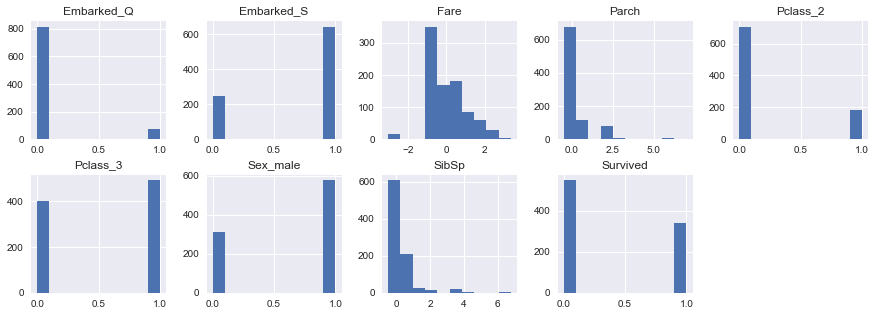

In [12]:
df_clean.hist(layout=(2,5), figsize=(15,5));

#### Missing values inspection

In [13]:
df_clean.isnull().sum()

Survived      0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Pclass_2      0
Pclass_3      0
Embarked_Q    0
Embarked_S    0
dtype: int64

### Q: Any highly correlated features?

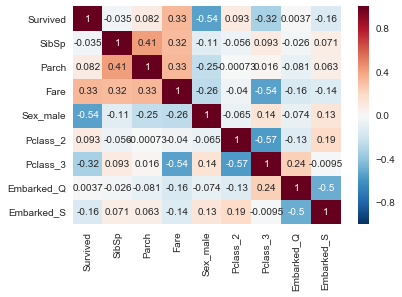

In [14]:
sns.heatmap(df_clean.corr(), annot=True);

### Split Data

In [15]:
idx_age_missing = y.isnull()

In [17]:
df_missing_age = df_clean.loc[idx_age_missing]

In [18]:
df1 = df_clean.loc[~idx_age_missing]
y1 = y.loc[~idx_age_missing]

In [19]:
train_idx, test_idx = model_selection.train_test_split(df1.index, test_size=0.2)

In [20]:
X_train = df1.loc[train_idx]
X_test  = df1.loc[test_idx]
y_train = y1.loc[train_idx]
y_test  = y1.loc[test_idx]

In [21]:
len(X_train), len(X_test)

(571, 143)

### Linear Regression

In statistics, linear regression is a linear approach for modeling the relationship between a scalar dependent variable $y$ and one or more explanatory variables (or independent variables) denoted $x$.

The case of one explanatory variable is called simple linear regression: $$ y= \beta x+\epsilon $$ 

For more than one explanatory variable, the process is called multiple linear regression: $$y=\beta_1 x_1+\beta_2 x_2+...+\beta_n x_n+\epsilon $$

### Model Fitting


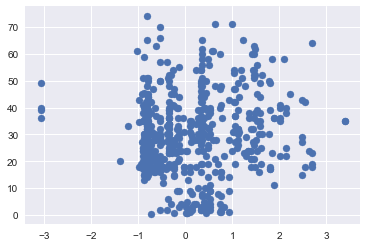

In [22]:
plt.scatter(X_train.Fare, y_train);

In [23]:
model = linear_model.LinearRegression()

In [24]:
model.fit(X_train, y_train, );

Fitted model


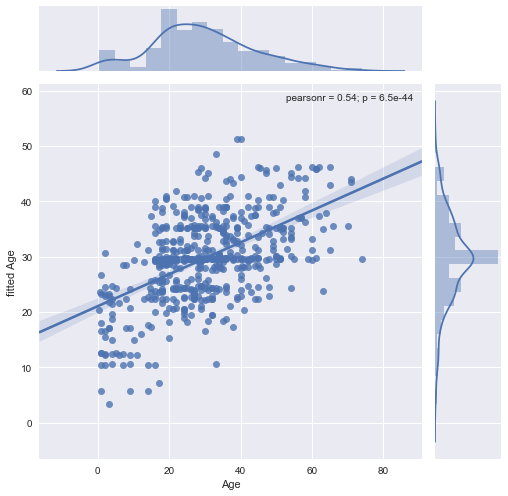

In [25]:
print "Fitted model"
y_fitted = model.predict(X_train)
g = sns.jointplot(y_train, y_fitted, kind="reg", size=7);
g.set_axis_labels(xlabel="Age",ylabel="fitted Age");

Intercept: 44.3524510358
Coefficients:


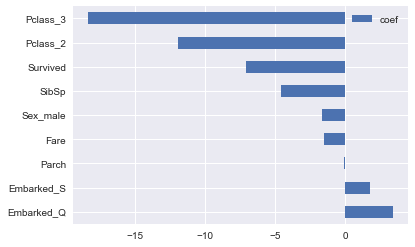

In [26]:
print 'Intercept:',model.intercept_
print 'Coefficients:'
coefs_df = pd.DataFrame(index=X_train.columns,data=model.coef_, columns=['coef']);
coefs_df.sort_values('coef', ascending=False).plot.barh();

### Q: Which features are more important?

### Q: Is it OK to use Survived as a feature to predict Age?

- Yes for this lab as a practice
- No if you wanted to submit to Kaggle

### Predicting


In [27]:
y_pred = model.predict(X_test)

### Model Evaluation

In [28]:
print "Correlation between predictions and actual values:",
print np.corrcoef(y_pred,y_test)[0,1]

Correlation between predictions and actual values: 0.485301694628


Predictions


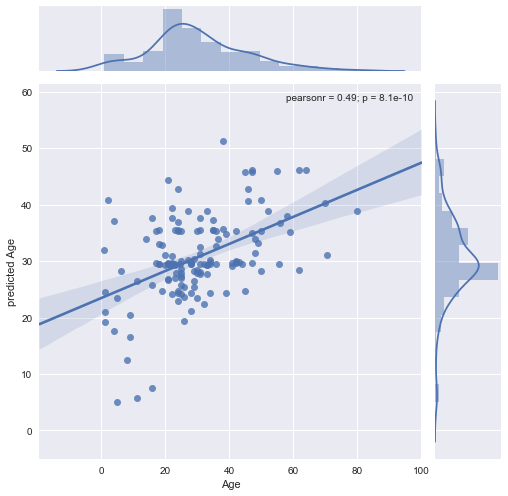

In [29]:
print "Predictions"
g = sns.jointplot(y_test, y_pred, kind="reg", size=7);
g.set_axis_labels(xlabel="Age",ylabel="predicted Age");

In [30]:
from sklearn import metrics
import numpy as np

In [31]:
print "MSE:",
print metrics.mean_squared_error(y_test, y_pred)

print "RMSE:",
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print "r^2 score:",
print metrics.r2_score(y_true=y_test, y_pred=y_pred)

MSE: 174.10714825
RMSE: 13.1949667771
r^2 score: 0.234391179503


In [32]:
residuals = y_test - y_pred

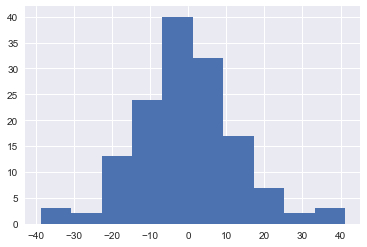

In [33]:
plt.hist(residuals);

### Other regression algorithms
http://scikit-learn.org/stable/supervised_learning.html#supervised-learning 

### Lasso Regression

In [34]:
lasso = linear_model.Lasso()
lasso.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Intercept: 31.3467692511
Coefficients:


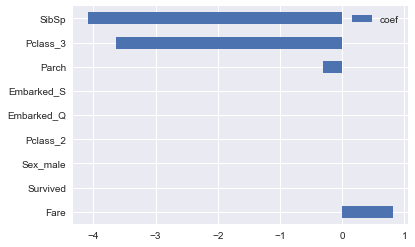

In [35]:
print 'Intercept:',lasso.intercept_
print 'Coefficients:'
coefs_df = pd.DataFrame(index=X_train.columns,data=lasso.coef_, columns=['coef']);
coefs_df.sort_values('coef', ascending=False).plot.barh();

Lasso - Fitted model


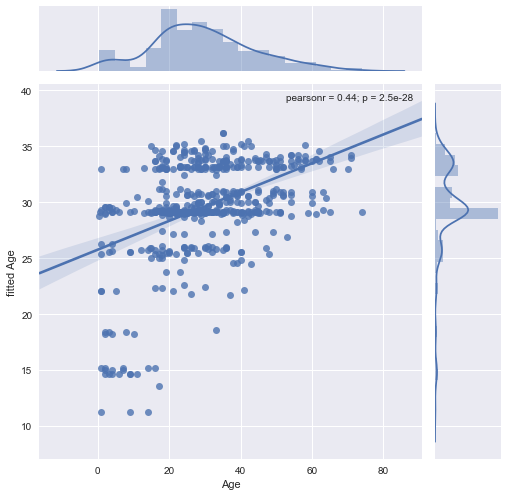

In [36]:
print "Lasso - Fitted model"
y_fitted = lasso.predict(X_train)
g = sns.jointplot(y_train, y_fitted, kind="reg", size=7);
g.set_axis_labels(xlabel="Age",ylabel="fitted Age");

In [37]:
y_pred = lasso.predict(X_test)

Lasso - Predictions


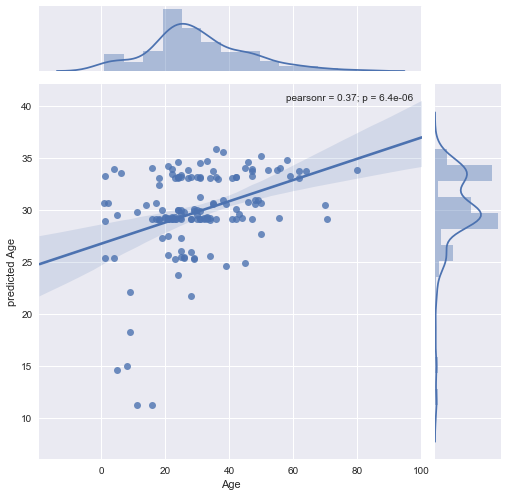

In [38]:
print "Lasso - Predictions"
g = sns.jointplot(y_test, y_pred, kind="reg", size=7);
g.set_axis_labels(xlabel="Age",ylabel="predicted Age");

In [39]:
print "MSE:",
print metrics.mean_squared_error(y_test, y_pred)

print "RMSE:",
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print "r^2 score:",
print metrics.r2_score(y_true=y_test, y_pred=y_pred)

MSE: 198.727709439
RMSE: 14.097081593
r^2 score: 0.126126131218


### Support Vector Machine (SVM)

In [40]:
from sklearn import svm

In [53]:
model_svm = svm.SVR(C=100)
model_svm.fit(X_train, y_train) 
y_pred = model_svm.predict(X_test)

SVM - Fitted model


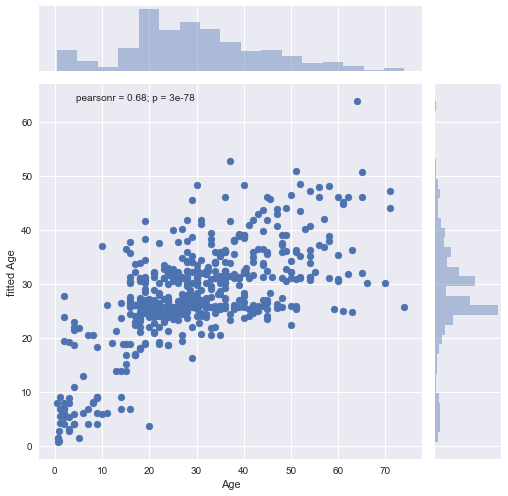

In [54]:
print "SVM - Fitted model"
y_fitted = model_svm.predict(X_train)
g = sns.jointplot(y_train, y_fitted, size=7);
g.set_axis_labels(xlabel="Age",ylabel="fitted Age");

In [55]:
y_pred = model_svm.predict(X_test)

SVM - Predictions


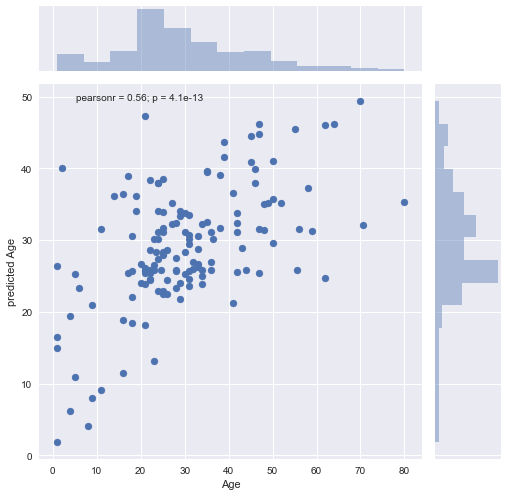

In [56]:
print "SVM - Predictions"
g = sns.jointplot(y_test, y_pred, size=7);
g.set_axis_labels(xlabel="Age",ylabel="predicted Age");

In [57]:
print "MSE:",
print metrics.mean_squared_error(y_test, y_pred)

print "RMSE:",
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print "r^2 score:",
print metrics.r2_score(y_true=y_test, y_pred=y_pred)

MSE: 157.556654923
RMSE: 12.5521573812
r^2 score: 0.307169372714


### Q: How to fine tune the hyper parameters?

In [59]:
#Grid search, etc

### Q: Which model is best so far?

In [58]:
#SVM

## Homework

### Q: How to improve accuracy? What if we use "Title"?

### Q: Use another regression algorithm and see if it performs better.

### Q: Using the best model, predict and impute Age for the passengers whos Age is missing. Save your final dataset.